# Data Exploration

# Testing

In [1]:
# imports
import requests
import pandas as pd
from matplotlib import pyplot as plt
import datetime

## Getting Data

In [2]:
date = datetime.datetime.strptime('2020-09-01', '%Y-%m-%d').date()
test = []
while date < datetime.datetime.now().date():
    d = date.strftime('%Y-%m-%d')
    print(d)
    try:
        test.append(pd.read_csv(f'https://archive.sensor.community/{d}/{d}_sds011_sensor_6842.csv', sep = ';'))
    except:
        print("\tdoes not exist jet")
    date += datetime.timedelta(days = 1)

2020-09-01
2020-09-02
2020-09-03
2020-09-04
2020-09-05
2020-09-06
2020-09-07
2020-09-08
2020-09-09
2020-09-10
2020-09-11
2020-09-12
2020-09-13
	does not exist jet


In [3]:
comp = test[0]
for i in range(1, len(test)):
    comp = pd.concat([comp, test[i]], axis = 0)
del test

In [4]:
comp

,sensor_id,sensor_type,location,lat,lon,timestamp,P1,durP1,ratioP1,P2,durP2,ratioP2
0,6842,SDS011,3460,52.028,8.916,2020-09-01T00:00:51,5.30,NaN,NaN,1.77,NaN,NaN
1,6842,SDS011,3460,52.028,8.916,2020-09-01T00:03:23,8.00,NaN,NaN,1.83,NaN,NaN
2,6842,SDS011,3460,52.028,8.916,2020-09-01T00:05:59,3.43,NaN,NaN,1.70,NaN,NaN
3,6842,SDS011,3460,52.028,8.916,2020-09-01T00:08:29,5.40,NaN,NaN,2.00,NaN,NaN
4,6842,SDS011,3460,52.028,8.916,2020-09-01T00:11:00,9.23,NaN,NaN,2.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
583,6842,SDS011,3460,52.028,8.916,2020-09-12T23:49:33,7.87,NaN,NaN,5.67,NaN,NaN
584,6842,SDS011,3460,52.028,8.916,2020-09-12T23:51:59,7.87,NaN,NaN,5.90,NaN,NaN
585,6842,SDS011,3460,52.028,8.916,2020-09-12T23:54:25,11.17,NaN,NaN,5.43,NaN,NaN
586,6842,SDS011,3460,52.028,8.916,2020-09-12T23:56:51,12.33,NaN,NaN,5.97,NaN,NaN


In [5]:
comp.describe()

,sensor_id,location,lat,lon,P1,durP1,ratioP1,P2,durP2,ratioP2
count,6935.0,6935.0,6.935000e+03,6.935000e+03,6935.000000,0.0,0.0,6935.000000,0.0,0.0
mean,6842.0,3460.0,5.202800e+01,8.916000e+00,8.448298,NaN,NaN,4.918539,NaN,NaN
std,0.0,0.0,7.105940e-15,1.776485e-15,8.010636,NaN,NaN,5.654931,NaN,NaN
min,6842.0,3460.0,5.202800e+01,8.916000e+00,0.500000,NaN,NaN,0.400000,NaN,NaN
25%,6842.0,3460.0,5.202800e+01,8.916000e+00,4.730000,NaN,NaN,2.100000,NaN,NaN
50%,6842.0,3460.0,5.202800e+01,8.916000e+00,6.870000,NaN,NaN,3.300000,NaN,NaN
75%,6842.0,3460.0,5.202800e+01,8.916000e+00,9.530000,NaN,NaN,5.330000,NaN,NaN
max,6842.0,3460.0,5.202800e+01,8.916000e+00,351.570000,NaN,NaN,213.230000,NaN,NaN


In [6]:
comp['timestamp'] = pd.to_datetime(comp['timestamp'])
comp = comp.set_index('timestamp')

In [7]:
comp

,sensor_id,sensor_type,location,lat,lon,P1,durP1,ratioP1,P2,durP2,ratioP2
timestamp,,,,,,,,,,,
2020-09-01 00:00:51,6842,SDS011,3460,52.028,8.916,5.30,NaN,NaN,1.77,NaN,NaN
2020-09-01 00:03:23,6842,SDS011,3460,52.028,8.916,8.00,NaN,NaN,1.83,NaN,NaN
2020-09-01 00:05:59,6842,SDS011,3460,52.028,8.916,3.43,NaN,NaN,1.70,NaN,NaN
2020-09-01 00:08:29,6842,SDS011,3460,52.028,8.916,5.40,NaN,NaN,2.00,NaN,NaN
2020-09-01 00:11:00,6842,SDS011,3460,52.028,8.916,9.23,NaN,NaN,2.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-09-12 23:49:33,6842,SDS011,3460,52.028,8.916,7.87,NaN,NaN,5.67,NaN,NaN
2020-09-12 23:51:59,6842,SDS011,3460,52.028,8.916,7.87,NaN,NaN,5.90,NaN,NaN
2020-09-12 23:54:25,6842,SDS011,3460,52.028,8.916,11.17,NaN,NaN,5.43,NaN,NaN


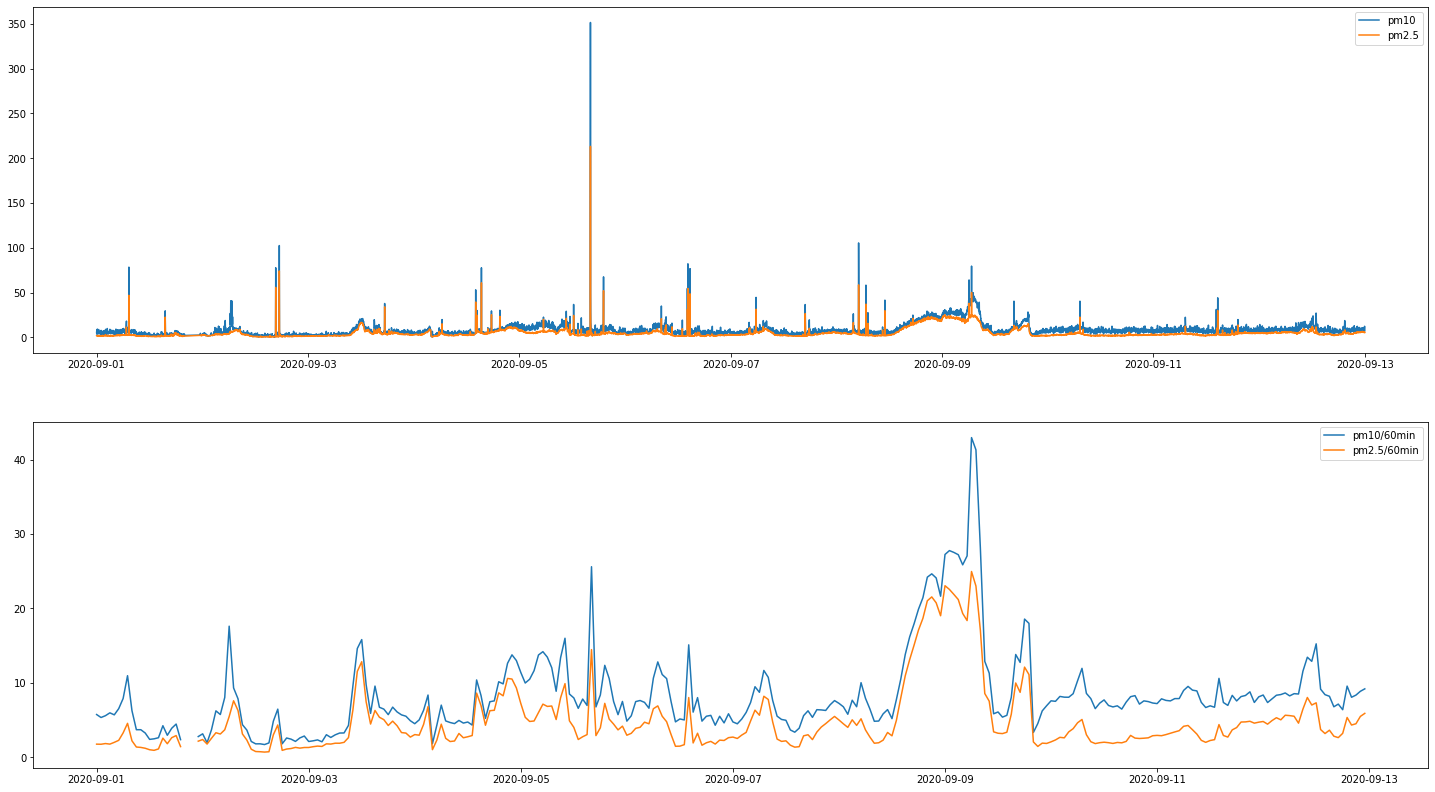

In [8]:
plt.figure(figsize = [25, 14])

plt.subplot(211)
plt.plot(comp['P1'], '-', label = 'pm10')
plt.plot(comp['P2'], '-', label = 'pm2.5')
plt.legend()


resampleTime = 60
comp2 = comp.resample(f'{resampleTime}min').mean()
plt.subplot(212)
plt.plot(comp2['P1'], '-', label = f'pm10/{resampleTime}min')
plt.plot(comp2['P2'], '-', label = f'pm2.5/{resampleTime}min')
plt.legend()

plt.show()

## Multiple Sensors

In [9]:
def get_sensor_data(SensorList):  
    SensorData = {}
    for sensor in SensorList:
        print(sensor)
        date = datetime.datetime.strptime('2020-09-05', '%Y-%m-%d').date()
        test = []
        comp = []
        while date < datetime.datetime.now().date():
            d = date.strftime('%Y-%m-%d')
            print(d)
            try:
                test.append(pd.read_csv(f'https://archive.sensor.community/{d}/{d}_sds011_sensor_{sensor}.csv', sep = ';'))
            except:
                print("\tdoes not exist jet")
                break
            date += datetime.timedelta(days = 1)
        try:
            comp = test[0]
            for i in range(1, len(test)):
                comp = pd.concat([comp, test[i]], axis = 0)
            comp['timestamp'] = pd.to_datetime(comp['timestamp'])
            comp = comp.set_index('timestamp')
        except:
            print("\tno data")
        SensorData[sensor] = comp
    return SensorData

In [10]:
SensorList = [line.rstrip('\n') for line in open("SensorList.txt")]
SensorData = get_sensor_data(SensorList[-5:])

11224
2020-09-05
2020-09-06
2020-09-07
2020-09-08
2020-09-09
2020-09-10
2020-09-11
2020-09-12
2020-09-13
	does not exist jet
9547
2020-09-05
2020-09-06
2020-09-07
2020-09-08
2020-09-09
2020-09-10
2020-09-11
2020-09-12
2020-09-13
	does not exist jet
564
2020-09-05
2020-09-06
2020-09-07
2020-09-08
2020-09-09
2020-09-10
2020-09-11
2020-09-12
2020-09-13
	does not exist jet
31035
2020-09-05
	does not exist jet
	no data
4857
2020-09-05
2020-09-06
2020-09-07
2020-09-08
2020-09-09
2020-09-10
2020-09-11
2020-09-12
2020-09-13
	does not exist jet


In [11]:
SensorData['4857']

,sensor_id,sensor_type,location,lat,lon,P1,durP1,ratioP1,P2,durP2,ratioP2
timestamp,,,,,,,,,,,
2020-09-05 00:04:27,4857,SDS011,2443,51.978,8.472,10.15,NaN,NaN,5.28,NaN,NaN
2020-09-05 00:09:23,4857,SDS011,2443,51.978,8.472,9.30,NaN,NaN,4.62,NaN,NaN
2020-09-05 00:14:20,4857,SDS011,2443,51.978,8.472,9.57,NaN,NaN,5.18,NaN,NaN
2020-09-05 00:19:16,4857,SDS011,2443,51.978,8.472,7.35,NaN,NaN,4.32,NaN,NaN
2020-09-05 00:24:12,4857,SDS011,2443,51.978,8.472,4.95,NaN,NaN,4.45,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-09-12 23:40:04,4857,SDS011,2443,51.978,8.472,16.52,NaN,NaN,8.07,NaN,NaN
2020-09-12 23:45:00,4857,SDS011,2443,51.978,8.472,12.57,NaN,NaN,8.50,NaN,NaN
2020-09-12 23:49:56,4857,SDS011,2443,51.978,8.472,10.95,NaN,NaN,8.30,NaN,NaN


## Getting a list of all sensors located in OWL

In [12]:
url = 'http://api.luftdaten.info/static/v1/data.json'
r = requests.get(url)
rdata = r.json()
df = pd.DataFrame(rdata)

In [13]:
df

,id,sampling_rate,timestamp,location,sensor,sensordatavalues
0,1866578317,NaN,2020-09-13 23:21:01,"{'id': 5061, 'latitude': '49.068', 'longitude'...","{'id': 10041, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4027242630, 'value': '16.20', 'value_t..."
1,1866578316,NaN,2020-09-13 23:21:01,"{'id': 26347, 'latitude': '47.708', 'longitude...","{'id': 40658, 'pin': '7', 'sensor_type': {'id'...","[{'id': 4027242628, 'value': '17.70', 'value_t..."
2,1866578315,NaN,2020-09-13 23:21:01,"{'id': 10768, 'latitude': '51.064', 'longitude...","{'id': 21222, 'pin': '7', 'sensor_type': {'id'...","[{'id': 4027242625, 'value': '17.30', 'value_t..."
3,1866578314,NaN,2020-09-13 23:21:01,"{'id': 24655, 'latitude': '51.00321015625', 'l...","{'id': 38898, 'pin': '7', 'sensor_type': {'id'...","[{'id': 4027242623, 'value': '17.40', 'value_t..."
4,1866578313,NaN,2020-09-13 23:21:01,"{'id': 9532, 'latitude': '54.322', 'longitude'...","{'id': 18808, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4027242627, 'value': '6.90', 'value_ty..."
...,...,...,...,...,...,...
46307,1866531787,NaN,2020-09-13 23:15:52,"{'id': 12268, 'latitude': '52.11', 'longitude'...","{'id': 24084, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4027141738, 'value': '14.23', 'value_t..."
46308,1866531786,NaN,2020-09-13 23:15:52,"{'id': 8191, 'latitude': '47.434', 'longitude'...","{'id': 16169, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4027141737, 'value': '7.90', 'value_ty..."
46309,1866531785,NaN,2020-09-13 23:15:52,"{'id': 15850, 'latitude': '47.524', 'longitude...","{'id': 28664, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4027141736, 'value': '13.35', 'value_t..."
46310,1866531784,NaN,2020-09-13 23:15:52,"{'id': 14785, 'latitude': '52.556', 'longitude...","{'id': 27294, 'pin': '11', 'sensor_type': {'id...","[{'id': 4027141733, 'value': '22.30', 'value_t..."


In [14]:
# longitudes
northPoint = 8.3255
southPoint = 9.5537

# latitudes
westPoint = 52.2396
eastPoint = 51.4762

In [15]:
for i in range(10):
    print('location: ' + str(df.location[i]))
    print('sensor: ' + str(df.sensor[i]))
    print('senosrdatavalues: ' + str(df.sensordatavalues[i]))
    print()

location: {'id': 5061, 'latitude': '49.068', 'longitude': '12.058', 'altitude': '416.4', 'country': 'DE', 'exact_location': 0, 'indoor': 0}
sensor: {'id': 10041, 'pin': '1', 'sensor_type': {'id': 14, 'name': 'SDS011', 'manufacturer': 'Nova Fitness'}}
senosrdatavalues: [{'id': 4027242630, 'value': '16.20', 'value_type': 'P1'}, {'id': 4027242631, 'value': '8.97', 'value_type': 'P2'}]

location: {'id': 26347, 'latitude': '47.708', 'longitude': '-2.13', 'altitude': '51.8', 'country': 'FR', 'exact_location': 0, 'indoor': 0}
sensor: {'id': 40658, 'pin': '7', 'sensor_type': {'id': 9, 'name': 'DHT22', 'manufacturer': 'various'}}
senosrdatavalues: [{'id': 4027242628, 'value': '17.70', 'value_type': 'temperature'}, {'id': 4027242629, 'value': '99.90', 'value_type': 'humidity'}]

location: {'id': 10768, 'latitude': '51.064', 'longitude': '3.688', 'altitude': '8.0', 'country': 'BE', 'exact_location': 0, 'indoor': 0}
sensor: {'id': 21222, 'pin': '7', 'sensor_type': {'id': 9, 'name': 'DHT22', 'manuf

In [16]:
df = df[df['location'].map(lambda x: 'DE' in x.values())]

In [17]:
bla = df[df['sensor'].map(lambda x: 'SDS011' in x['sensor_type'].values())]

In [18]:
bla.shape

(11596, 6)

In [19]:
df.shape

(22584, 6)

In [20]:
longitude = bla['location'].apply(lambda x: x.get('longitude'))
latitude = bla['location'].apply(lambda x: x.get('latitude'))

In [21]:
bla = bla.assign(longitude = longitude.values)
bla = bla.assign(latitude = latitude.values)

In [22]:
bla

,id,sampling_rate,timestamp,location,sensor,sensordatavalues,longitude,latitude
0,1866578317,NaN,2020-09-13 23:21:01,"{'id': 5061, 'latitude': '49.068', 'longitude'...","{'id': 10041, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4027242630, 'value': '16.20', 'value_t...",12.058,49.068
4,1866578313,NaN,2020-09-13 23:21:01,"{'id': 9532, 'latitude': '54.322', 'longitude'...","{'id': 18808, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4027242627, 'value': '6.90', 'value_ty...",10.116,54.322
8,1866578309,NaN,2020-09-13 23:21:01,"{'id': 21176, 'latitude': '52.54629800000', 'l...","{'id': 33796, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4027242611, 'value': '18.87', 'value_t...",13.34489400000,52.54629800000
21,1866578293,NaN,2020-09-13 23:21:01,"{'id': 25526, 'latitude': '48.12287820000', 'l...","{'id': 39854, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4027242584, 'value': '18.62', 'value_t...",11.53297530000,48.12287820000
32,1866578282,NaN,2020-09-13 23:21:01,"{'id': 4622, 'latitude': '50.21', 'longitude':...","{'id': 9174, 'pin': '1', 'sensor_type': {'id':...","[{'id': 4027242565, 'value': '5.63', 'value_ty...",8.26,50.21
...,...,...,...,...,...,...,...,...
46301,1866531793,NaN,2020-09-13 23:15:52,"{'id': 11018, 'latitude': '51.258', 'longitude...","{'id': 4353, 'pin': '1', 'sensor_type': {'id':...","[{'id': 4027141753, 'value': '10.73', 'value_t...",6.806,51.258
46304,1866531790,NaN,2020-09-13 23:15:52,"{'id': 14514, 'latitude': '48.72932745000', 'l...","{'id': 26959, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4027141740, 'value': '10.43', 'value_t...",9.33154218952,48.72932745000
46305,1866531789,NaN,2020-09-13 23:15:52,"{'id': 6926, 'latitude': '51.95', 'longitude':...","{'id': 13708, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4027141741, 'value': '11.57', 'value_t...",7.608,51.95
46306,1866531788,NaN,2020-09-13 23:15:52,"{'id': 3845, 'latitude': '48.12', 'longitude':...","{'id': 7607, 'pin': '1', 'sensor_type': {'id':...","[{'id': 4027141739, 'value': '11.97', 'value_t...",11.534,48.12


In [23]:
bla.drop('location', axis = 1)

,id,sampling_rate,timestamp,sensor,sensordatavalues,longitude,latitude
0,1866578317,NaN,2020-09-13 23:21:01,"{'id': 10041, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4027242630, 'value': '16.20', 'value_t...",12.058,49.068
4,1866578313,NaN,2020-09-13 23:21:01,"{'id': 18808, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4027242627, 'value': '6.90', 'value_ty...",10.116,54.322
8,1866578309,NaN,2020-09-13 23:21:01,"{'id': 33796, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4027242611, 'value': '18.87', 'value_t...",13.34489400000,52.54629800000
21,1866578293,NaN,2020-09-13 23:21:01,"{'id': 39854, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4027242584, 'value': '18.62', 'value_t...",11.53297530000,48.12287820000
32,1866578282,NaN,2020-09-13 23:21:01,"{'id': 9174, 'pin': '1', 'sensor_type': {'id':...","[{'id': 4027242565, 'value': '5.63', 'value_ty...",8.26,50.21
...,...,...,...,...,...,...,...
46301,1866531793,NaN,2020-09-13 23:15:52,"{'id': 4353, 'pin': '1', 'sensor_type': {'id':...","[{'id': 4027141753, 'value': '10.73', 'value_t...",6.806,51.258
46304,1866531790,NaN,2020-09-13 23:15:52,"{'id': 26959, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4027141740, 'value': '10.43', 'value_t...",9.33154218952,48.72932745000
46305,1866531789,NaN,2020-09-13 23:15:52,"{'id': 13708, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4027141741, 'value': '11.57', 'value_t...",7.608,51.95
46306,1866531788,NaN,2020-09-13 23:15:52,"{'id': 7607, 'pin': '1', 'sensor_type': {'id':...","[{'id': 4027141739, 'value': '11.97', 'value_t...",11.534,48.12


In [24]:
bla['longitude'] = pd.to_numeric(bla.longitude)

In [25]:
bla['latitude'] = pd.to_numeric(bla.latitude)

In [26]:
bla = bla[bla.longitude >= northPoint]
bla = bla[bla.longitude <= southPoint]
bla = bla[bla.latitude <= westPoint]
bla = bla[bla.latitude >= eastPoint]

In [27]:
bla.reset_index(inplace = True)

In [28]:
bla

,index,id,sampling_rate,timestamp,location,sensor,sensordatavalues,longitude,latitude
0,191,1866578122,NaN,2020-09-13 23:21:00,"{'id': 18602, 'latitude': '51.722', 'longitude...","{'id': 32086, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4027242230, 'value': '9.25', 'value_ty...",8.732000,51.722000
1,341,1866577972,NaN,2020-09-13 23:21:00,"{'id': 6705, 'latitude': '51.744', 'longitude'...","{'id': 13273, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4027241970, 'value': '8.27', 'value_ty...",8.668000,51.744000
2,406,1866577907,NaN,2020-09-13 23:21:00,"{'id': 2294, 'latitude': '51.818', 'longitude'...","{'id': 4563, 'pin': '1', 'sensor_type': {'id':...","[{'id': 4027241785, 'value': '8.80', 'value_ty...",8.484000,51.818000
3,474,1866577839,NaN,2020-09-13 23:20:59,"{'id': 5274, 'latitude': '51.992', 'longitude'...","{'id': 10452, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4027241642, 'value': '15.93', 'value_t...",8.518000,51.992000
4,488,1866577825,NaN,2020-09-13 23:20:59,"{'id': 1945, 'latitude': '52.036', 'longitude'...","{'id': 3859, 'pin': '1', 'sensor_type': {'id':...","[{'id': 4027241614, 'value': '9.23', 'value_ty...",8.614000,52.036000
...,...,...,...,...,...,...,...,...,...
229,44590,1866533509,NaN,2020-09-13 23:16:02,"{'id': 2043, 'latitude': '52.184', 'longitude'...","{'id': 4055, 'pin': '1', 'sensor_type': {'id':...","[{'id': 4027145483, 'value': '29.10', 'value_t...",8.690000,52.184000
230,44720,1866533379,NaN,2020-09-13 23:16:00,"{'id': 11013, 'latitude': '51.828', 'longitude...","{'id': 21703, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4027145192, 'value': '0.00', 'value_ty...",8.656000,51.828000
231,44988,1866533111,NaN,2020-09-13 23:15:59,"{'id': 11438, 'latitude': '52.044', 'longitude...","{'id': 22543, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4027144602, 'value': '4.95', 'value_ty...",8.716000,52.044000
232,45823,1866532272,NaN,2020-09-13 23:15:54,"{'id': 5561, 'latitude': '52.04', 'longitude':...","{'id': 11016, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4027142766, 'value': '9.73', 'value_ty...",8.542000,52.040000


### Plotting Sensor Locations on a map of OWL

In [29]:
boundingBox = (northPoint, southPoint, eastPoint, westPoint)
boundingBox

(8.3255, 9.5537, 51.4762, 52.2396)

In [30]:
owl_map = plt.imread('map.png')

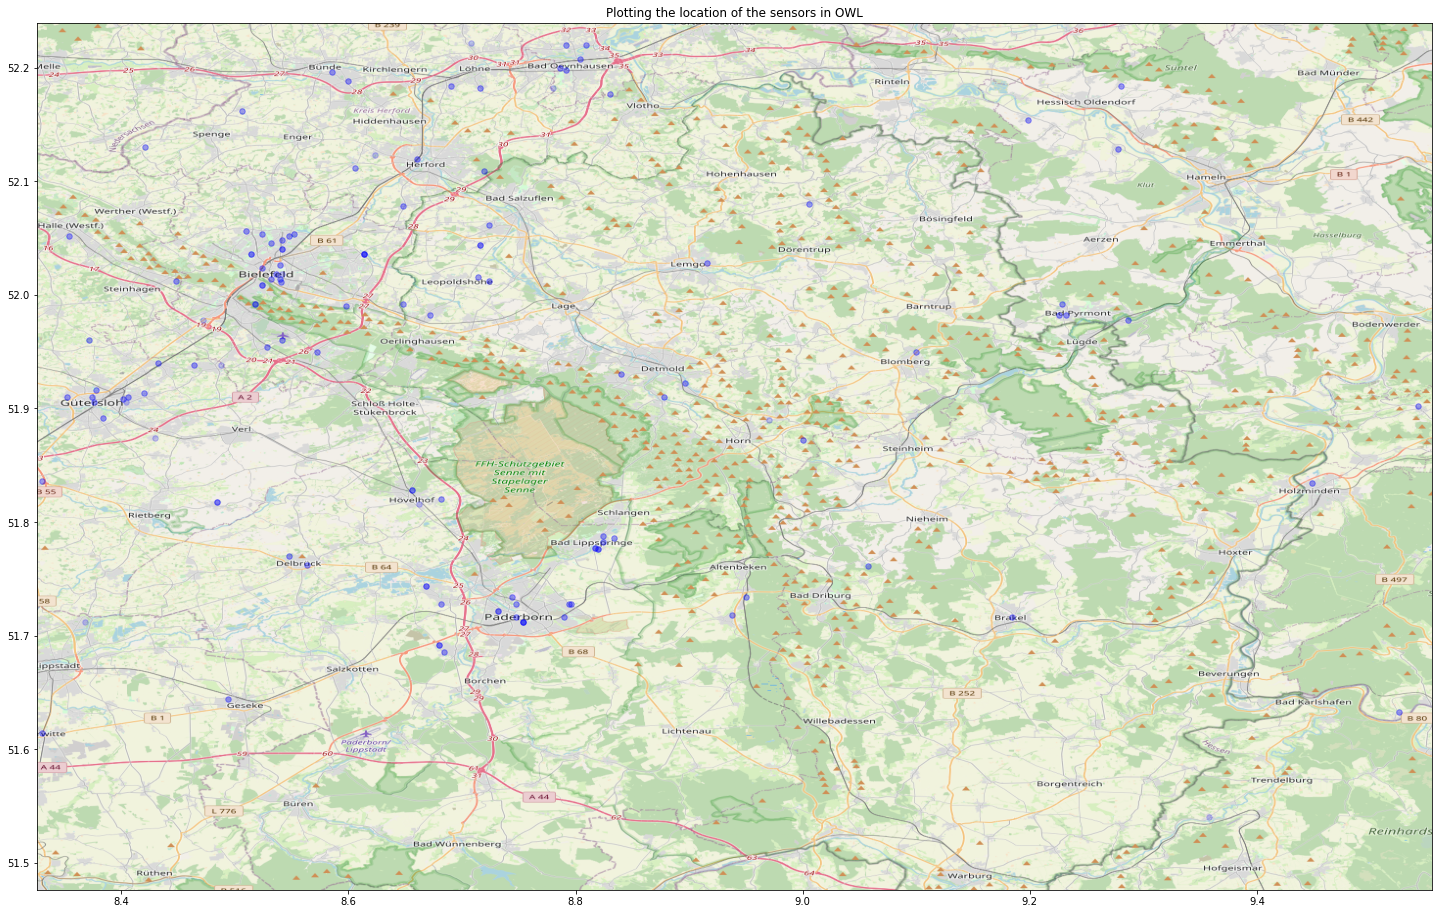

In [31]:
fig, ax = plt.subplots(figsize = (25, 30))

ax.scatter(bla.longitude, bla.latitude, zorder = 1, alpha = 0.2, c = 'b', s = 30)

ax.set_title('Plotting the location of the sensors in OWL')
ax.set_xlim(boundingBox[0], boundingBox[1])
ax.set_ylim(boundingBox[2], boundingBox[3])

ax.imshow(owl_map, zorder = 0, extent = boundingBox)

In [32]:
sensorList = list(bla['sensor'].apply(lambda x: x.get('id')))
len(sensorList)

234